# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict the type of traffic sign. You are provided with a dataset of traffic sign images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing)
### **Dataset Name:** Traffic Signs

### **Description:**  
The dataset contains images of various German traffic signs labeled for classification purposes. Each image belongs to one of the 43 classes, representing different types of traffic signs.

### **Labels:**
```python
classes = {
    0:  'Speed limit (20km/h)',
    1:  'Speed limit (30km/h)',
    2:  'Speed limit (50km/h)',
    3:  'Speed limit (60km/h)',
    4:  'Speed limit (70km/h)',
    5:  'Speed limit (80km/h)',
    6:  'End of speed limit (80km/h)',
    7:  'Speed limit (100km/h)',
    8:  'Speed limit (120km/h)',
    9:  'No passing',
    10: 'No passing veh over 3.5 tons',
    11: 'Right-of-way at intersection',
    12: 'Priority road',
    13: 'Yield',
    14: 'Stop',
    15: 'No vehicles',
    16: 'Veh > 3.5 tons prohibited',
    17: 'No entry',
    18: 'General caution',
    19: 'Dangerous curve left',
    20: 'Dangerous curve right',
    21: 'Double curve',
    22: 'Bumpy road',
    23: 'Slippery road',
    24: 'Road narrows on the right',
    25: 'Road work',
    26: 'Traffic signals',
    27: 'Pedestrians',
    28: 'Children crossing',
    29: 'Bicycles crossing',
    30: 'Beware of ice/snow',
    31: 'Wild animals crossing',
    32: 'End speed + passing limits',
    33: 'Turn right ahead',
    34: 'Turn left ahead',
    35: 'Ahead only',
    36: 'Go straight or right',
    37: 'Go straight or left',
    38: 'Keep right',
    39: 'Keep left',
    40: 'Roundabout mandatory',
    41: 'End of no passing',
    42: 'End no passing veh > 3.5 tons'
}
```



## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing).

In [5]:
#https://drive.google.com/file/d/1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ/view?usp=sharing
!pip install gdown
!gdown --id 1HwMV-Lt_sWoxc5v6igmTxTwomS3DR6cQ
!unzip Traffic_Signs.zip

Streaming output truncated to the last 5000 lines.
 extracting: Traffic_Signs/Dataset/13/00013_00004_00022.png  
  inflating: Traffic_Signs/Dataset/13/00013_00021_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00003_00023.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00007.png  
 extracting: Traffic_Signs/Dataset/13/00013_00034_00029.png  
  inflating: Traffic_Signs/Dataset/13/00013_00045_00013.png  
  inflating: Traffic_Signs/Dataset/13/00013_00068_00019.png  
 extracting: Traffic_Signs/Dataset/13/00013_00003_00004.png  
 extracting: Traffic_Signs/Dataset/13/00013_00017_00010.png  
 extracting: Traffic_Signs/Dataset/13/00013_00046_00003.png  
  inflating: Traffic_Signs/Dataset/13/00013_00057_00008.png  
 extracting: Traffic_Signs/Dataset/13/00013_00058_00011.png  
 extracting: Traffic_Signs/Dataset/13/00013_00063_00017.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00013.png  
 extracting: Traffic_Signs/Dataset/13/00013_00002_00006.png  
  inflating: Traffi

## Import Libraries

In [108]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder,StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
import cv2
from matplotlib import pyplot as plt

array([[[67, 81, 86],
        [55, 62, 68],
        [55, 64, 72],
        ...,
        [39, 47, 49],
        [43, 52, 55],
        [40, 47, 51]],

       [[50, 62, 70],
        [51, 59, 68],
        [48, 57, 67],
        ...,
        [36, 48, 53],
        [39, 52, 57],
        [36, 45, 50]],

       [[44, 55, 66],
        [51, 56, 67],
        [52, 59, 71],
        ...,
        [42, 52, 61],
        [40, 52, 59],
        [37, 46, 52]],

       ...,

       [[42, 45, 48],
        [40, 45, 47],
        [40, 45, 46],
        ...,
        [36, 45, 48],
        [43, 52, 53],
        [47, 59, 59]],

       [[38, 42, 44],
        [35, 40, 41],
        [34, 40, 41],
        ...,
        [36, 44, 50],
        [35, 44, 45],
        [44, 56, 53]],

       [[37, 42, 48],
        [34, 40, 44],
        [31, 39, 42],
        ...,
        [37, 45, 49],
        [34, 43, 46],
        [40, 53, 55]]], dtype=uint8)
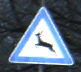

In [42]:
cv2.imread("Traffic_Signs/Dataset/31/00031_00017_00015.png")

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [43]:
df=pd.read_csv("Traffic_Signs/Dataset_MetaData.csv")

In [106]:
train=tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0,validation_split=0.30)

## Data Splitting
In this section, we will split our dataset into three parts:

* Training set (70%).
* Validation set (15%).
* Test set (15%).

In [149]:
train_data=train.flow_from_directory("Traffic_Signs/Dataset",target_size=(64, 64),subset="training",batch_size=64)
test_data=train.flow_from_directory("Traffic_Signs/Dataset",target_size=(64, 64),subset="validation",batch_size=64)

Found 27447 images belonging to 43 classes.
Found 11762 images belonging to 43 classes.


## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [192]:
model=tf.keras.models.Sequential()
model.add(layers.Conv2D(32,kernel_size=(3,3),activation="relu",padding="same",input_shape=(([64,64,3]))))
model.add(layers.Dropout(0.6))
model.add(layers.MaxPool2D())

model.add(layers.Flatten())


model.add(layers.Dense(256,activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128,activation="relu"))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(43,activation="softmax"))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 43)                  │           2,795 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,433,707 (32.17 MB)

 Trainable params: 8,433,707 (32.17 MB)

 Non-trainable params: 0 (0.00 B)

In [193]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [194]:
history=model.fit(train_data,epochs=10,validation_data=(test_data),batch_size=32)

Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 33s 67ms/step - accuracy: 0.1232 - loss: 3.4488 - val_accuracy: 0.3858 - val_loss: 2.8324
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 21s 49ms/step - accuracy: 0.3506 - loss: 2.3881 - val_accuracy: 0.4954 - val_loss: 2.1707
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.4734 - loss: 1.7842 - val_accuracy: 0.5907 - val_loss: 1.8452
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.5836 - loss: 1.3769 - val_accuracy: 0.6561 - val_loss: 1.6160
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 22s 52ms/step - accuracy: 0.6732 - loss: 1.0907 - val_accuracy: 0.7160 - val_loss: 1.3023
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.7228 - loss: 0.8991 - val_accuracy: 0.7422 - val_loss: 1.1507
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.7605 - loss: 0.7759 - val_accuracy: 0.7470 - val_loss: 1.0674
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 19s 45ms/step - accuracy: 0.7845 - loss: 0.6913 - 

In [195]:
history2=model.fit(train_data,epochs=10,validation_data=(test_data),batch_size=32)

Epoch 1/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.8499 - loss: 0.4841 - val_accuracy: 0.8153 - val_loss: 0.8155
Epoch 2/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.8626 - loss: 0.4399 - val_accuracy: 0.8147 - val_loss: 0.7648
Epoch 3/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.8786 - loss: 0.4043 - val_accuracy: 0.8128 - val_loss: 0.7517
Epoch 4/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.8871 - loss: 0.3695 - val_accuracy: 0.8208 - val_loss: 0.7190
Epoch 5/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.8986 - loss: 0.3363 - val_accuracy: 0.8233 - val_loss: 0.6991
Epoch 6/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9063 - loss: 0.3091 - val_accuracy: 0.8242 - val_loss: 0.6831
Epoch 7/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 39s 44ms/step - accuracy: 0.9101 - loss: 0.2978 - val_accuracy: 0.8361 - val_loss: 0.6478
Epoch 8/10
429/429 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.9210 - loss: 0.2749 - 

In [199]:
history.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [196]:
model.evaluate(test_data)

184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.8439 - loss: 0.5973


[0.5895368456840515, 0.847559928894043]

## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

In [205]:
model.predict(test_data)

184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step


array([[1.2827401e-04, 1.0831289e-04, 2.3242082e-03, ..., 8.1758347e-04,
        1.7598733e-04, 2.0652042e-04],
       [2.3500771e-10, 5.0994469e-08, 2.0484417e-13, ..., 4.2352225e-13,
        2.3121702e-07, 5.0226858e-12],
       [9.8010339e-03, 5.8162007e-03, 2.2274221e-03, ..., 2.9759989e-03,
        1.1710308e-03, 2.3762817e-03],
       ...,
       [1.5027025e-07, 5.0180694e-07, 9.9486554e-01, ..., 2.0202908e-04,
        2.4504236e-05, 2.7328474e-03],
       [2.5546015e-03, 3.4163289e-03, 1.2342818e-03, ..., 7.9029761e-02,
        7.0774382e-01, 1.0472176e-03],
       [7.7835369e-01, 1.4772853e-01, 2.3951952e-07, ..., 6.1771930e-03,
        3.3903339e-05, 2.1851180e-07]], dtype=float32)

if you need new, we prepared some data for you [here](https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

In [154]:
#https://drive.google.com/file/d/1S_vpQntND9839x8kJpegaEgtSIA4JxHO/view?usp=sharing
!gdown --id 1S_vpQntND9839x8kJpegaEgtSIA4JxHO
!unzip Test_Dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1S_vpQntND9839x8kJpegaEgtSIA4JxHO

but Gdown can't. Please check connections and permissions.
unzip:  cannot find or open Test_Dataset.zip, Test_Dataset.zip.zip or Test_Dataset.zip.ZIP.


In [200]:
range(0,20)

range(0, 20)

## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

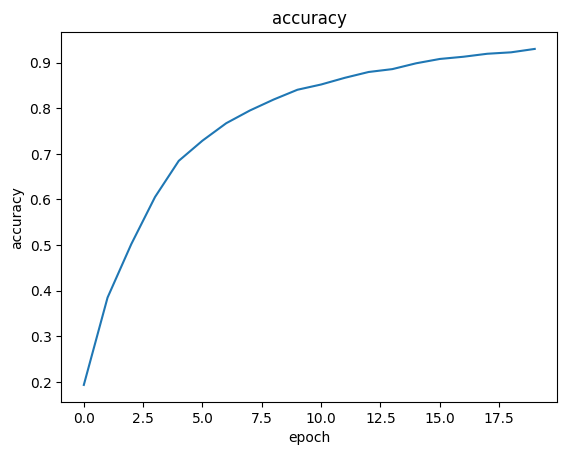

In [201]:
plt.title("accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(range(0,20),history.history["accuracy"]+history2.history["accuracy"])

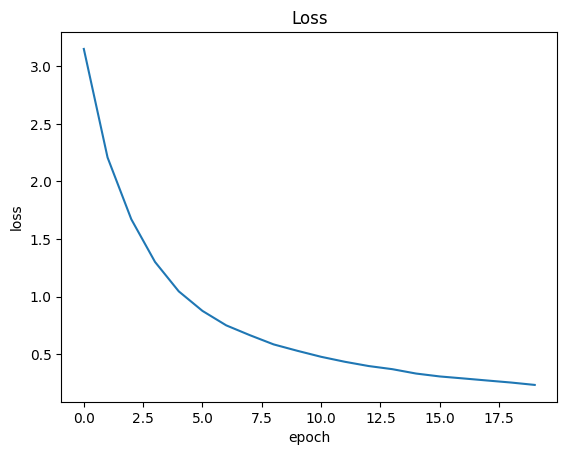

In [203]:
plt.title("Loss")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.plot(range(0,20),history.history["loss"]+history2.history["loss"])

## Save the Model
Save the trained CNN model for submission.

In [204]:
model.save("cnn_model.h5")

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?
2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?
3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1-   resizeing all images to be the same size for the model and normlize it by deviding it with 255

FOR TRAIN,TEST,VALIDATION
the model will not benefit from the validation set hence i only split it to validation and training

2-  starting with normal cnn without dropout, the model was overfitting, after adding dropout it become less overfitting

3- Activation Functions is relu for hidden layers and softmax for output layer since it is multiple classifcation problem

4-   the smaller the batch size the slower the learning the better the resault, 10 epochs enough to show if the model is overfitting

5-   for loss it is categorical_crossentropy since it is mulitple classification problem and for Metrics it is accuracy

6-  for Regularization Techniques i used dropout to pervent overfitting

7-  for model Evaluation just used model.evluate

8- the model is loss is going down and the accuracy is going up which is good

9-  the model tend to be overfitting